# Task 4 – Problem 1
## Exploratory Data Analysis (EDA)
Dataset: Titanic Dataset

**Name:- Pranjal Godse - Batch:- 6**

## Objective
Perform detailed exploratory data analysis on the Titanic dataset to understand patterns affecting survival.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Load Dataset

In [3]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2026-02-21 11:05:14--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2026-02-21 11:05:15 (1.99 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [4]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Understanding

In [5]:

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handling Missing Values

In [6]:

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop("Cabin", axis=1, inplace=True)

df.isnull().sum()


/tmp/ipython-input-2268371815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2268371815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Feature Engineering

In [7]:

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 1, "IsAlone"] = 0

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,1,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,1,False,True


## Visualizations

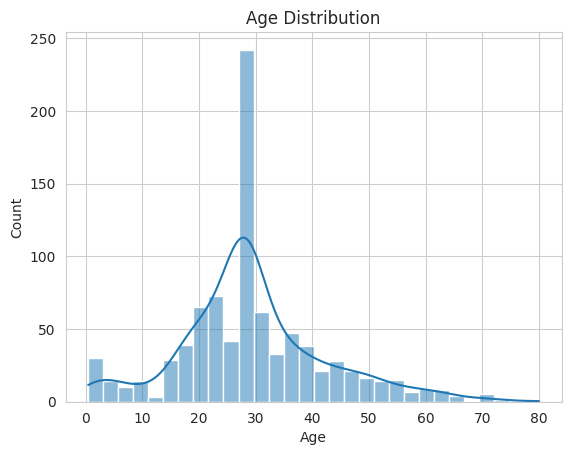

In [8]:

# Histogram - Age Distribution
plt.figure()
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


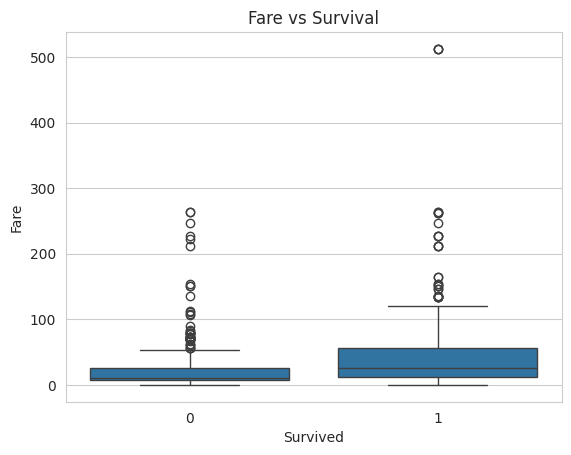

In [9]:

# Boxplot - Fare vs Survival
plt.figure()
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()


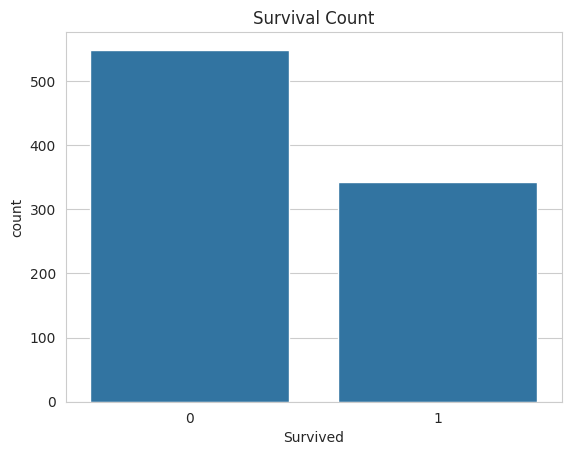

In [10]:

# Survival Count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


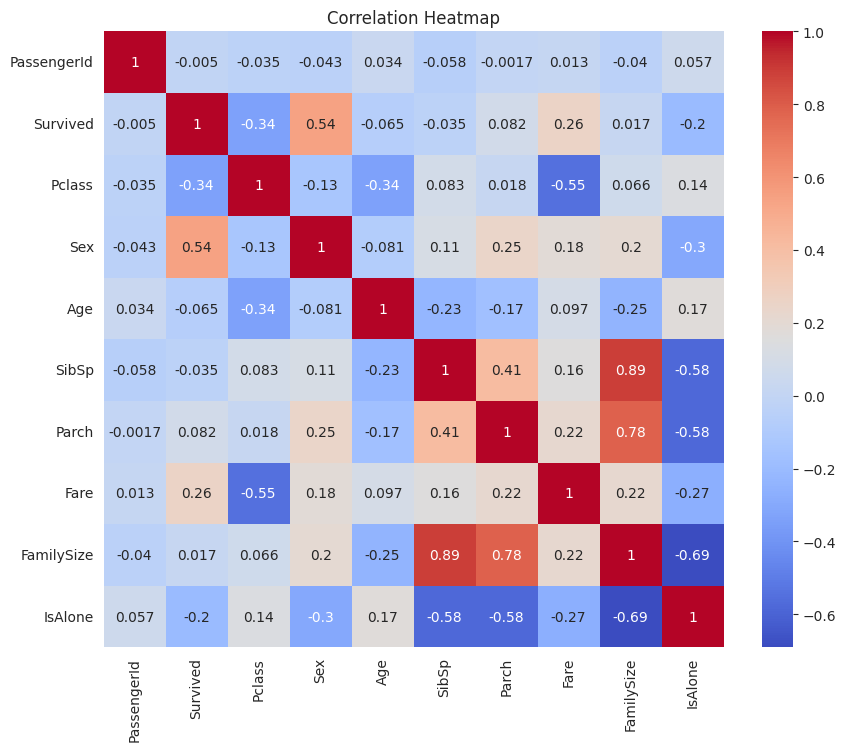

In [12]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


## Key Insights

1. Females had higher survival rate.
2. First-class passengers survived more.
3. Higher fare is positively correlated with survival.
4. Family size impacts survival.
5. Gender and Pclass are strong predictors.
